## Phase 3 Project: Syriatel Customer Churn
by Jimmy Mumo

# Introduction

The telecommunications industry is an ever-evolving landscape and retaining customers is of utmost importance for sustainable business success. 
Customer churn is a phenomenon where the subscribers discontinue services for whatever reason. This poses a challenge for telecom companies as it directly affects revenue streams as well as market competitiveness as customers may opt to seek the services of rival telecom companies.

## Data Understanding 
This section deals with the undeerstanding of the data for the purposes of exploratory data analysis as well as data modelling.
The required libraries are loaded in

In [97]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LogisticRegression  

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE




In [98]:
# Loading the data as a pandas dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [99]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [100]:
# Size of the dataset
df.size

69993

In [101]:
# Shape of the dataset
df.shape

(3333, 21)

In [102]:
# Displaying the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [103]:
# Previewing the bottom rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


## Data Preparation

In [104]:
# Looking for duplicates and missing values 

duplicate_values = df.duplicated().sum()

missing_values = df.isna().sum()

print (f'Duplicated values:', duplicate_values)
print(f'missing values:', missing_values)

Duplicated values: 0
missing values: state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [105]:
# Removing whitespaces in the column name and replacing with '_'
df.columns = df.columns.str.replace(' ', '_')

In [106]:
# checking the whitespace changes
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [107]:
# checking for the general shape of the df
df.shape

(3333, 21)

In [108]:
# Viewing the statistical details such as std, percentile, count, and the mean
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [109]:
#confirming that there no missing values (nan) in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [110]:
# checking for value_count for the different state abbreviations
df.state.value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [111]:
# dropping the state column
df = df.drop('state', axis=1)

In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   phone_number            3333 non-null   object 
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_minutes       3333 non-null   float64
 7   total_day_calls         3333 non-null   int64  
 8   total_day_charge        3333 non-null   float64
 9   total_eve_minutes       3333 non-null   float64
 10  total_eve_calls         3333 non-null   int64  
 11  total_eve_charge        3333 non-null   float64
 12  total_night_minutes     3333 non-null   float64
 13  total_night_calls       3333 non-null   int64  
 14  total_night_charge      3333 non-null   

In [113]:
# checking account length column
df.account_length.value_counts()

105    43
87     42
101    40
93     40
90     39
       ..
243     1
200     1
232     1
5       1
221     1
Name: account_length, Length: 212, dtype: int64

In [114]:
df.area_code.unique()

array([415, 408, 510], dtype=int64)

In [115]:
df.area_code.value_counts()


415    1655
510     840
408     838
Name: area_code, dtype: int64

In [116]:
df.phone_number


0       382-4657
1       371-7191
2       358-1921
3       375-9999
4       330-6626
          ...   
3328    414-4276
3329    370-3271
3330    328-8230
3331    364-6381
3332    400-4344
Name: phone_number, Length: 3333, dtype: object

In [118]:
# Remove hyphen and convert to integer
df['phone_number'] = df['phone_number'].str.replace('-', '').astype(int)

In [119]:
# checking if above conversion is effected
df.phone_number


0       3824657
1       3717191
2       3581921
3       3759999
4       3306626
         ...   
3328    4144276
3329    3703271
3330    3288230
3331    3646381
3332    4004344
Name: phone_number, Length: 3333, dtype: int32

In [120]:
# Check for duplicates in the 'phone number' column
duplicates = df.duplicated('phone_number')

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = df[duplicates]
duplicate_rows


,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn


In [121]:
# making phone_number column to be the index column given its the unique identifier
df.set_index('phone_number', inplace=True)

In [122]:
# previewing the general info to confirm same has been reflected in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 3824657 to 4004344
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 no

In [123]:
# checking general df to see that both changes have been effected
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
phone_number,,,,,,,,,,,,,,,,,,,
3824657,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
3717191,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3581921,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3759999,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
3306626,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144276,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3703271,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3288230,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [124]:
# Counting the occurrences of responses in this column
counts = df['international_plan'].value_counts()
counts


no     3010
yes     323
Name: international_plan, dtype: int64

In [125]:
# Counting the occurrences of responses in this column
counts1 = df['voice_mail_plan'].value_counts()
counts1

no     2411
yes     922
Name: voice_mail_plan, dtype: int64

In [126]:
# looking at value_counts for this column
df.number_vmail_messages.value_counts()

0     2411
31      60
29      53
28      51
33      46
27      44
30      44
24      42
26      41
32      41
25      37
23      36
36      34
22      32
35      32
39      30
34      29
37      29
21      28
38      25
20      22
19      19
40      16
42      15
17      14
16      13
41      13
43       9
15       9
18       7
44       7
14       7
45       6
12       6
46       4
13       4
47       3
50       2
9        2
8        2
11       2
48       2
49       1
4        1
10       1
51       1
Name: number_vmail_messages, dtype: int64

In [127]:
# checking for total entry per unique item in the total_day_minutes column
df.total_day_minutes.value_counts()

154.0    8
159.5    8
174.5    8
183.4    7
175.4    7
        ..
78.6     1
200.9    1
254.3    1
247.0    1
180.8    1
Name: total_day_minutes, Length: 1667, dtype: int64

In [128]:
#reviewing the churn column
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

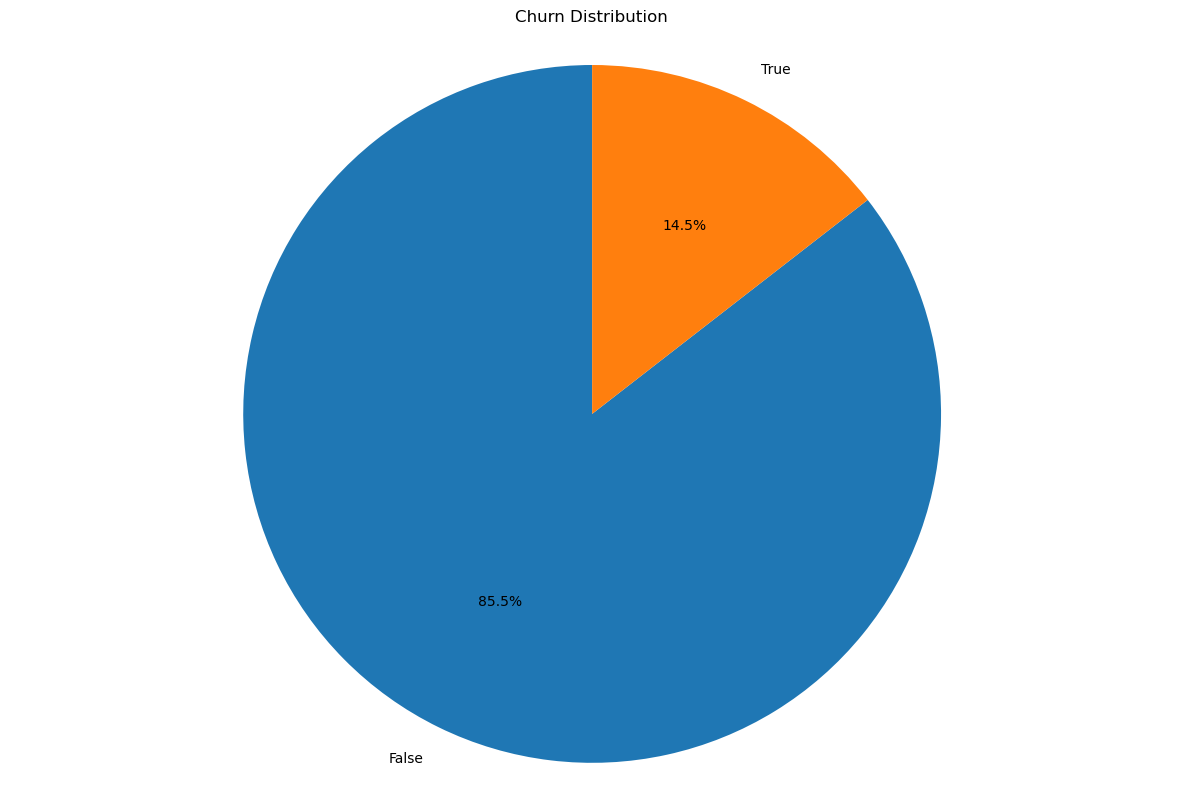

In [129]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

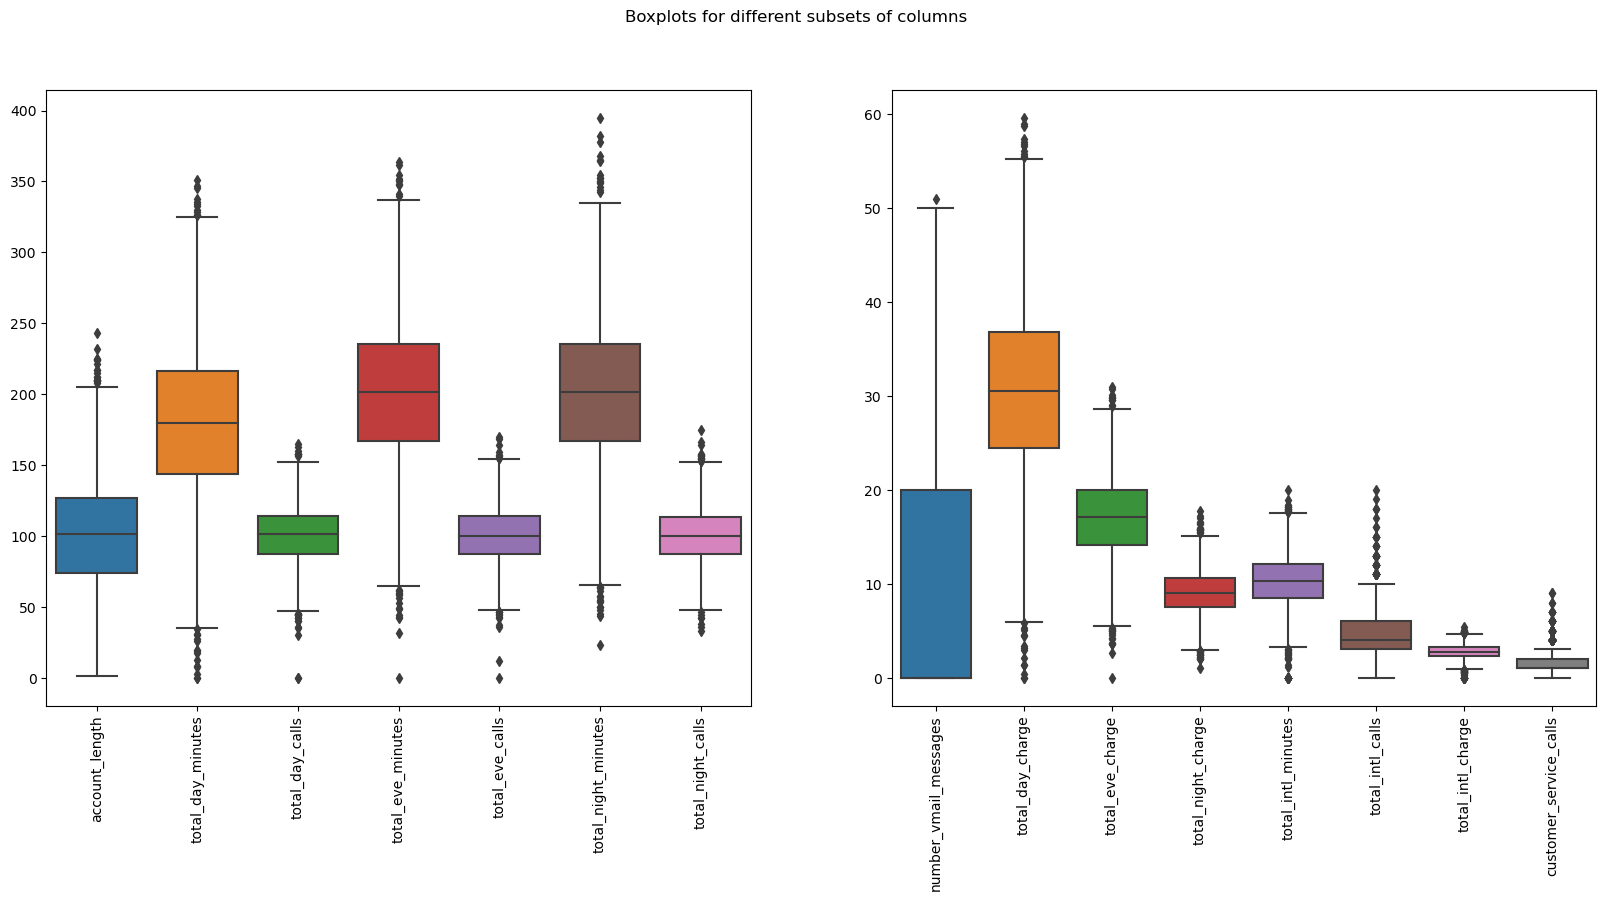

In [130]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account_length','total_day_minutes','total_day_calls',
                'total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']

# List of columns for the second boxplot
cols2 = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

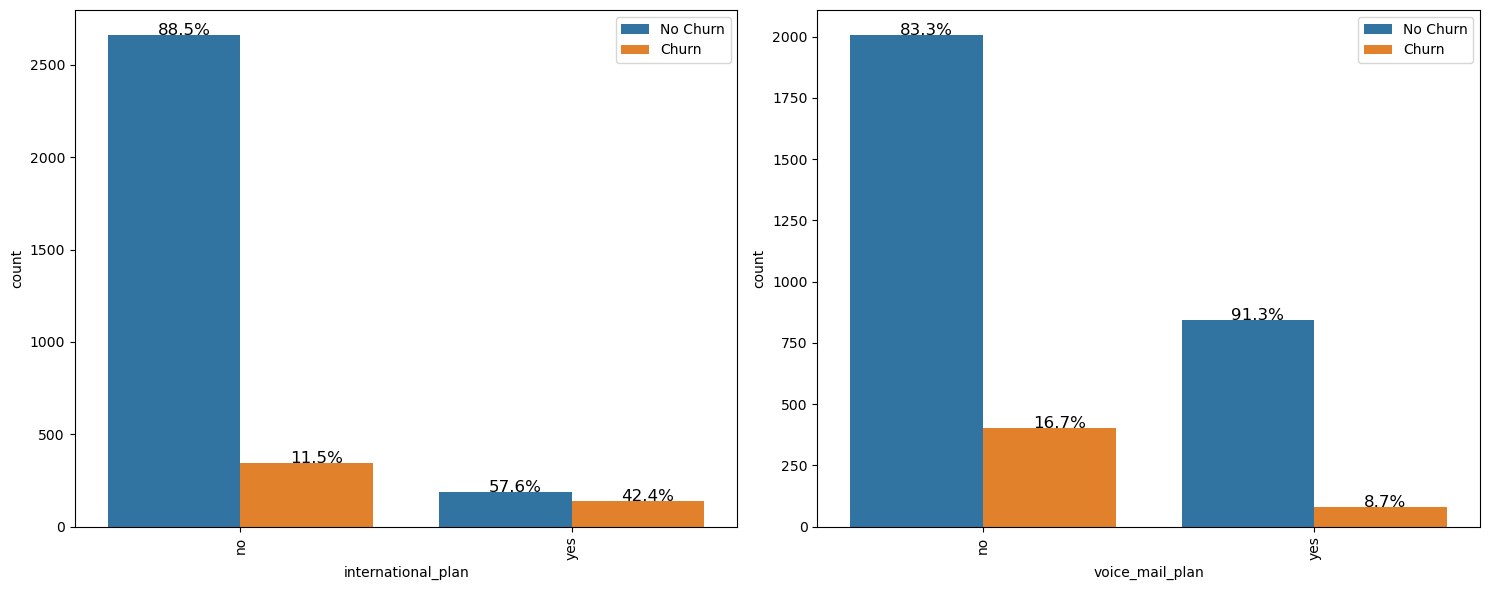

In [131]:
categoric_cols = ['international_plan','voice_mail_plan']

fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 6))

for i, col in enumerate(categoric_cols):
    ax = sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")

    # Calculate the total number of observations within each group
    totals = df.groupby(col)["churn"].count().values

    # Iterate over the rectangles in the plot
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

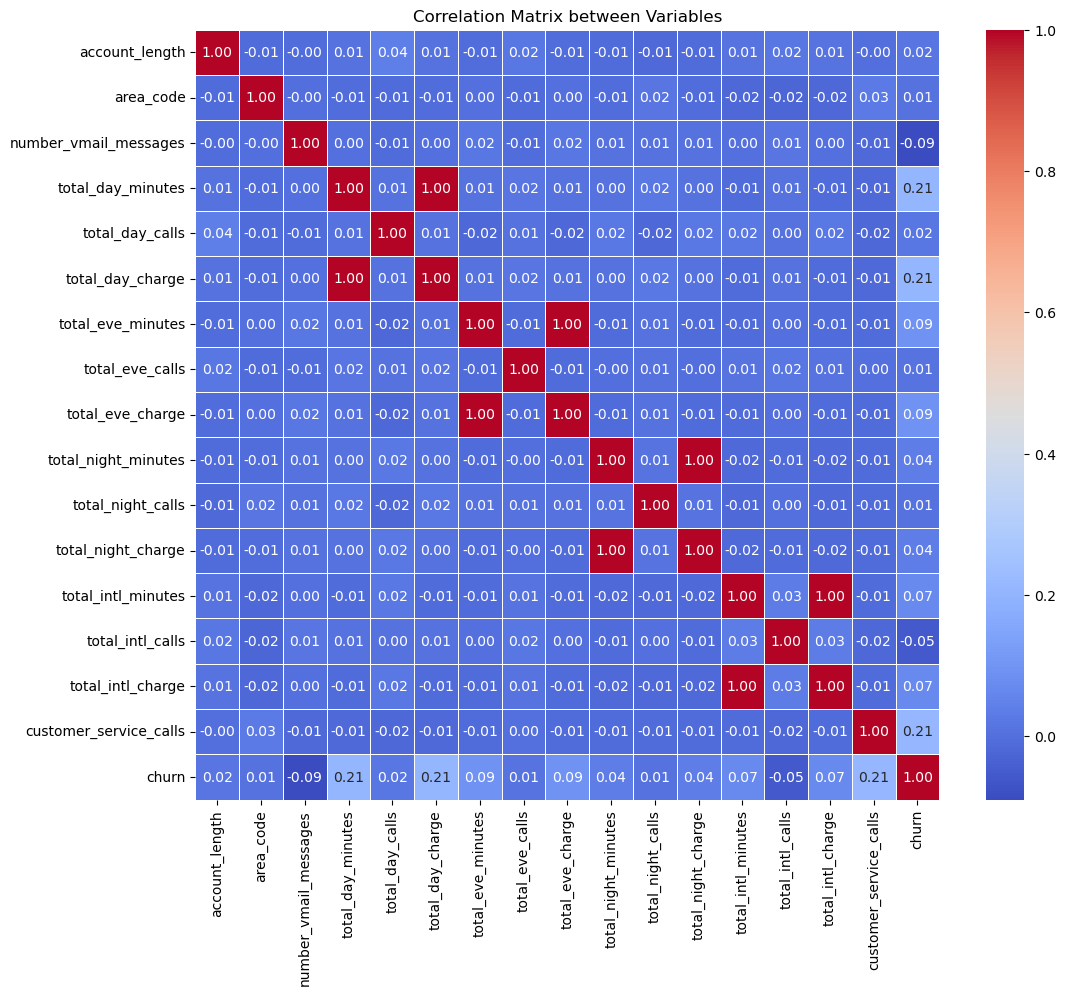

In [132]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show();

In [133]:
#convert churn values to integer 1s and 0s
df['churn'] = df['churn'].astype(int)

#convert area_code, international plan, and voice_mail_plan to integers 1s and 0s
df = pd.get_dummies(df, columns=['area_code', 'international_plan', 'voice_mail_plan'])


In [134]:
#displace the first 10 records
df.head(7)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
3824657,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,2.70,1,0,0,1,0,1,0,0,1
3717191,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,3.70,1,0,0,1,0,1,0,0,1
3581921,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,3.29,0,0,0,1,0,1,0,1,0
3759999,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,1.78,2,0,1,0,0,0,1,1,0
3306626,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,2.73,3,0,0,1,0,0,1,1,0
3918027,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,...,1.70,0,0,0,0,1,0,1,1,0
3559993,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,...,2.03,3,0,0,0,1,1,0,0,1


In [135]:
# Separating features from the target variable
y = df['churn']
X = df.drop('churn', axis=1)

bruh

In [136]:

df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous i
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(total_day_minutes, total_day_charge)",1.000000
"(total_day_charge, total_day_minutes)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993
"(number_vmail_messages, voice_mail_plan_no)",0.956927


## Feature Engineering 

Feature engineering is the process of 

## Label Encoding 

Label Encoding

## One-Hot Encoding 

One Hot-Encoding is 

In [137]:
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df[[column]])

# Iterate through numerical columns and scale them
for column in df.select_dtypes(include=[np.number]).columns:
    df[[column]] = scaling(column)

df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,total_intl_charge,customer_service_calls,churn,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
phone_number,,,,,,,,,,,,,,,,,,,,,
3824657,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.500000,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3717191,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.685185,0.111111,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3581921,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.609259,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3759999,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.329630,0.222222,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3306626,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.505556,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


# Data Modelling 

- Logistic Regression 
- Decision Tree
- Random Forest 
- XG Boost

In [138]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [139]:

# Perform a split in the data into Training set and test sets 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

SMOTE 

In [140]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

standardizing the data and solving class imbalance problems

In [141]:
y=df['churn']
X= df.drop('churn', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=20)

# standardizing the data
scaler= MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# Set the random seed
random_seed = 42
np.random.seed(random_seed)
# smote
smote= SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
 
y_train_resampled.value_counts()

0.0    1992
1.0    1992
Name: churn, dtype: int64

# Logistic regression

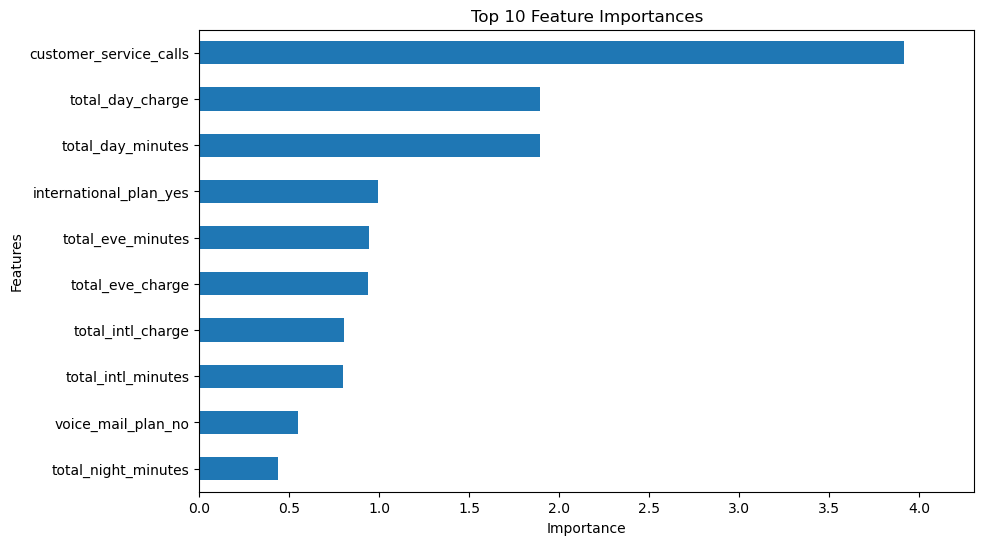

In [148]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training data and labels
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Now you can access the coefficients
importance = logreg.coef_[0]

# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

In [151]:
# Performing Logistic Regression

# Train-Test Split
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

CR = classification_report(y_test, y_pred)
print("Classification Report (Test Data):\n", CR)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Data):\n", conf_matrix)

Accuracy: 0.8515742128935532


TypeError: 'str' object is not callable

In [ ]:
#Feature Importance in the logistics Regression

importance_logreg = logreg.coef_[0]
Feature_names = resampled_X_train.columns
Feature_importances = pd.Series(importance_logreg,index=Feature_names)
Feature_importances = Feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
top_features = Feature_importances[:10] #selecting the top 10
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('TOP 10 Feature Importances')
plt.xlim(0, max(top_features)*1.1) #setting nthe xlim to the max importance value
plt.show()


NameError: name 'logreg' is not defined